1. Loading data

In [1]:
import pandas as pd
df= pd.read_csv("SleepAnalysis.csv");
df.head()


,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


2. Renaming columns

In [2]:
#only columns required in study
df = df.rename(columns={
    "4. On average, how many hours of sleep do you get on a typical day?": "SleepHours",
    "7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?": "ConcentrationIssue",
    "8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?": "Fatigue",
    "14. How would you describe your stress levels related to academic workload?": "StressLevel",
    "15. How would you rate your overall academic performance (GPA or grades) in the past semester?": "AcademicPerformance"
})


3. Encoding to numeric values

In [3]:
#encode sleep hours
sleep_map = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 8.5
}
df["SleepHours"] = df["SleepHours"].map(sleep_map)

#encode concentration and fatigue
freq_map = {
    "Never": 0,
    "Rarely (1-2 times a month)": 1,
    "Rarely (1-2 times a week)": 2,
    "Sometimes (1-2 times a week)": 3,
    "Sometimes (3-4 times a week)": 4,
    "Often (5-6 times a week)": 5,
    "Always": 6,
    "Every day": 7
}
df["ConcentrationIssue"] = df["ConcentrationIssue"].map(freq_map)
df["Fatigue"] = df["Fatigue"].map(freq_map)

#encode stress
stress_map = {
    "Low stress": 1,
    "Moderate stress": 2,
    "High stress": 3,
    "Extremely high stress": 4
}
df["StressLevel"] = df["StressLevel"].map(stress_map)

#encode academic performance
performance_map = {
    "Below Average": 1,
    "Average": 2,
    "Good": 3,
    "Excellent": 4
}
df["AcademicPerformance"] = df["AcademicPerformance"].map(performance_map)


4. Checking and approximating missing values

In [4]:
df[["SleepHours", "ConcentrationIssue", "StressLevel", "AcademicPerformance", "Fatigue"]].isna().sum()
#Fill with mean value
cols = ["SleepHours", "ConcentrationIssue", "StressLevel", "Fatigue"]
df[cols] = df[cols].fillna(df[cols].mean())
df["AcademicPerformance"] = df["AcademicPerformance"].fillna(df["AcademicPerformance"].mode()[0])



5. Build Linear Regression Model

In [5]:
x = df[["SleepHours", "StressLevel", "ConcentrationIssue", "Fatigue"]]
y = df["AcademicPerformance"]

6. Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

7. Training Model

In [7]:
#Checking if any null values are there
print(x_train.isna().sum())

SleepHours            0
StressLevel           0
ConcentrationIssue    0
Fatigue               0
dtype: int64


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

8. Evaluate Model using Linear Regression

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.25327946152475245
R²: 0.13392555370784043


9. Results of linear regression

In [10]:
for col, coef in zip(x.columns, model.coef_):
    print(col, ":", coef)


SleepHours : -0.008517688753809479
StressLevel : -0.14246285034223163
ConcentrationIssue : -0.15337433545561954
Fatigue : -0.06207514781015283


10. Sleep hours vs Academic Performance box plot

<Figure size 800x500 with 0 Axes>

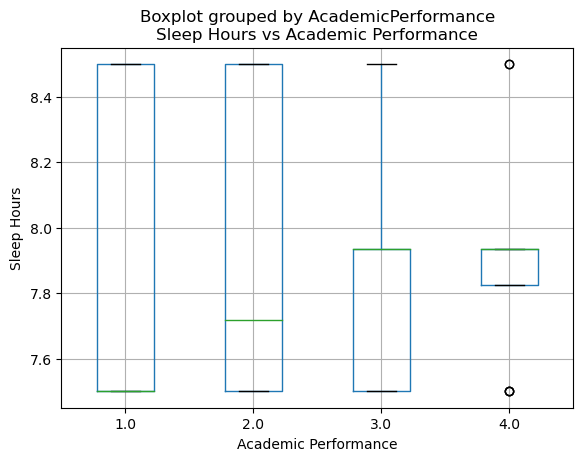

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column="SleepHours", by="AcademicPerformance")
plt.title("Sleep Hours vs Academic Performance")
plt.xlabel("Academic Performance")
plt.ylabel("Sleep Hours")
plt.show()


11. Stress level vs Academic Performance box plot

<Figure size 800x500 with 0 Axes>

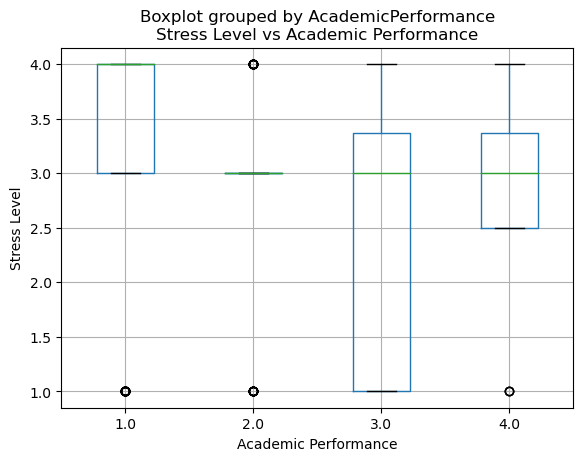

In [13]:
plt.figure(figsize=(8,5))
df.boxplot(column="StressLevel", by="AcademicPerformance")
plt.title("Stress Level vs Academic Performance")
plt.xlabel("Academic Performance")
plt.ylabel("Stress Level")
plt.show()


12. Fatigue vs Academic Performance box plot

<Figure size 800x500 with 0 Axes>

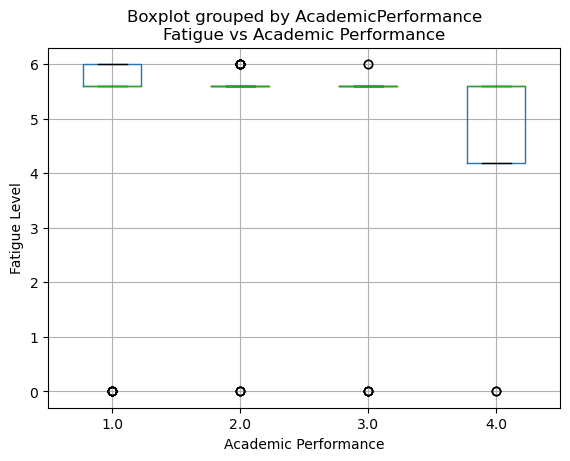

In [14]:
plt.figure(figsize=(8,5))
df.boxplot(column="Fatigue", by="AcademicPerformance")
plt.title("Fatigue vs Academic Performance")
plt.xlabel("Academic Performance")
plt.ylabel("Fatigue Level")
plt.show()
